In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# funções de custo por modal (r$/ton)
def frete_rodo(distancia_km):
    return 0.1715 * distancia_km + 61.98

def frete_ferro(distancia_km):
    return 0.15 * distancia_km

def frete_hidro(distancia_km):
    return 0.09 * distancia_km

# custos fixos (r$/ton)
custo_transbordo = 15 # rodo-ferro e rodo_hidro
custo_elevacao = 30

# frete marítimo
custo_navio_dia = 150_000
capacidade_navio = 50_000
quant_produzida = 100_000
custo_navio_dia_ton = custo_navio_dia / capacidade_navio
num_navios = quant_produzida / capacidade_navio

In [3]:
distancias = {
    # Arco Norte — eixo Tapajós
    "confresa_miritituba": 1244,      # arco_norte - rodo
    "miritituba_barcarena": 1100,      # arco_norte - hidro
    "miritituba_santarem": 300,        # arco_norte - hidro

    # Arco Norte — eixo Norte–Sul
    "confresa_palmeirante": 666,       # arco_norte - rodo
    "palmeirante_itaqui": 1200,        # arco_norte - ferro (Norte–Sul / EFC)

    # Arco Sul/Sudeste — eixo ferroviário
    "confresa_rondonopolis": 922,      # arco_sul - rodo
    "rondonopolis_santos": 1600,       # arco_sul - ferro
    "rondonopolis_paranagua": 1400     # arco_sul - ferro
}


In [4]:
custos_ate_navio = {
    "santarem": (
        frete_rodo(distancias["confresa_miritituba"]) +
        custo_transbordo +
        frete_hidro(distancias["miritituba_santarem"]) +
        custo_elevacao
    ),
    "barcarena": (
        frete_rodo(distancias["confresa_miritituba"]) +
        custo_transbordo +
        frete_hidro(distancias["miritituba_barcarena"]) +
        custo_elevacao
    ),
    "itaqui": (
        frete_rodo(distancias["confresa_palmeirante"]) +
        custo_transbordo +
        frete_ferro(distancias["palmeirante_itaqui"]) +
        custo_elevacao
    ),
    "santos": (
        frete_rodo(distancias["confresa_rondonopolis"]) +
        custo_transbordo +
        frete_ferro(distancias["rondonopolis_santos"]) +
        custo_elevacao
    ),
    "paranagua": (
        frete_rodo(distancias["confresa_rondonopolis"]) +
        custo_transbordo +
        frete_ferro(distancias["rondonopolis_paranagua"]) +
        custo_elevacao
    )    
}


In [5]:
df = pd.DataFrame({
    "porto": ["santarem", "barcarena", "itaqui", "santos","paranagua"],
    "rota": ["arco_norte", "arco_norte", "arco_norte", "sul_sudeste", "sul_sudeste"],
    "custo_ate_navio": [
        custos_ate_navio["santarem"],
        custos_ate_navio["barcarena"],
        custos_ate_navio["itaqui"],
        custos_ate_navio["santos"],
        custos_ate_navio["paranagua"]
    ],
})


In [6]:
df["dias_china"] = df["rota"].apply(
    lambda r: 45 if r == "arco_norte" else 40
)

In [7]:
# custo marítimo por tonelada (ajustado para 2 navios)
df["custo_maritimo"] = df["dias_china"] * custo_navio_dia_ton * num_navios

# custo total por tonelada
df["custo_total"] = df["custo_ate_navio"] + df["custo_maritimo"]

df

,porto,rota,custo_ate_navio,dias_china,custo_maritimo,custo_total
0,santarem,arco_norte,347.326,45,270.0,617.326
1,barcarena,arco_norte,419.326,45,270.0,689.326
2,itaqui,arco_norte,401.199,45,270.0,671.199
3,santos,sul_sudeste,505.103,40,240.0,745.103
4,paranagua,sul_sudeste,475.103,40,240.0,715.103


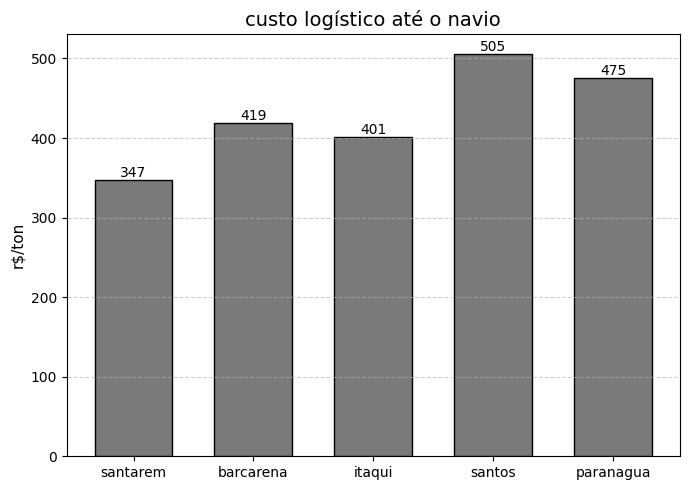

In [ ]:
plt.figure(figsize=(7, 5))

barras = plt.bar(df["porto"], df["custo_ate_navio"],edgecolor="black", width=0.65,color="#7a7a7a")

plt.title("custo logístico até o navio", fontsize=14)
plt.ylabel("r$/ton", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura:.0f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


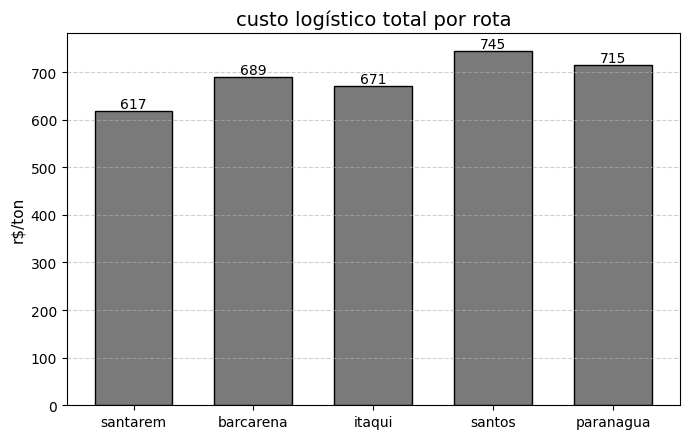

In [ ]:
plt.figure(figsize=(7, 4.5))

barras = plt.bar(df["porto"], df["custo_total"],edgecolor="black", width=0.65,color="#7a7a7a")

plt.title("custo total por rota", fontsize=14)
plt.ylabel("r$/ton", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura:.0f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


In [10]:
# velocidade por dia
velocidades = {
    "rodoviario": 500,   # caminhão granel
    "ferroviario": 800,  # ferrovia
    "hidroviario": 300   # barcaça
}

# tempo
tempo_transbordo = 1.0    # rodo → ferro / rodo → hidro

tempo_maritimo = {
    "santarem": 45,
    "barcarena": 45,
    "itaqui": 45,
    "santos": 40,
    "paranagua": 40
}

tempo_porto_operacional = {
    "santarem": 4,       # estimativa
    "barcarena": 3,      # estimativa
    "itaqui": 3,         # estimativa
    "santos": 7,         # congestionado e alto throughput
    "paranagua": 5       # congestionado em fases
}

In [11]:
rotas = {
    "santarem": [
        ("rodoviario", distancias["confresa_miritituba"]),
        ("hidroviario", distancias["miritituba_santarem"])
    ],
    "barcarena": [
        ("rodoviario", distancias["confresa_miritituba"]),
        ("hidroviario", distancias["miritituba_barcarena"])
    ],
    "itaqui": [
        ("rodoviario", distancias["confresa_palmeirante"]),
        ("ferroviario", distancias["palmeirante_itaqui"])
    ],
    "santos": [
        ("rodoviario", distancias["confresa_rondonopolis"]),
        ("ferroviario", distancias["rondonopolis_santos"])
    ],
    "paranagua": [
        ("rodoviario", distancias["confresa_rondonopolis"]),
        ("ferroviario", distancias["rondonopolis_paranagua"])
    ]
}


In [12]:
def calcular_tempo_rota(trechos, nome_rota):
    tempo = 0
    for modal, distancia in trechos:
        tempo += distancia / velocidades[modal]
    
    tempo += tempo_transbordo
    
    # tempo gasto no porto realista (espera + operação)
    tempo += tempo_porto_operacional[nome_rota]
    
    tempo += tempo_maritimo[nome_rota]
    
    return tempo


In [13]:
resultados = {}

for rota, trechos in rotas.items():
    resultados[rota] = {
        "custo": custos_ate_navio[rota],
        "tempo_total": calcular_tempo_rota(trechos, rota),
    }

custo_min = min(r["custo"] for r in resultados.values())
tempo_min = min(r["tempo_total"] for r in resultados.values())

for rota, dados in resultados.items():
    dados["score_custo"] = custo_min / dados["custo"]
    dados["score_tempo"] = tempo_min / dados["tempo_total"]

peso_custo = 0.6
peso_tempo = 0.4

for rota, dados in resultados.items():
    dados["score_total"] = (
        peso_custo * dados["score_custo"] +
        peso_tempo * dados["score_tempo"]
    )

In [14]:
ranking = sorted(
    resultados.items(),
    key=lambda x: x[1]["score_total"],
    reverse=True
)

for i, (rota, dados) in enumerate(ranking, 1):
    print(
        f"{i}º {rota.lower()} | "
        f"Custo: {dados['custo']:.2f} | "
        f"Tempo: {dados['tempo_total']:.1f} dias | "
        f"Score: {dados['score_total']:.3f}"
    )


1º santarem | Custo: 347.33 | Tempo: 53.5 dias | Score: 0.971
2º itaqui | Custo: 401.20 | Tempo: 51.8 dias | Score: 0.902
3º barcarena | Custo: 419.33 | Tempo: 55.2 dias | Score: 0.857
4º paranagua | Custo: 475.10 | Tempo: 49.6 dias | Score: 0.839
5º santos | Custo: 505.10 | Tempo: 51.8 dias | Score: 0.795


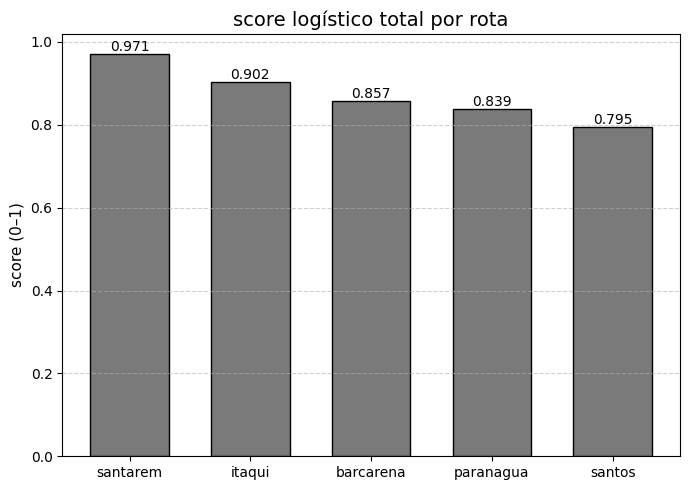

In [15]:
# Transformar ranking em DataFrame
df = pd.DataFrame([
    {
        "porto": rota.lower(),
        "custo_total": dados["custo"],
        "tempo_total": dados["tempo_total"],
        "score_total": dados["score_total"]
    }
    for rota, dados in ranking
])

plt.figure(figsize=(7, 5))

barras = plt.bar(
    df["porto"],
    df["score_total"],
    edgecolor="black",
    width=0.65,
    color="#7a7a7a"
)

plt.title("score logístico total por rota", fontsize=14)
plt.ylabel("score (0–1)", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura:.3f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()
